In [2]:
'''
使用dataset1:
dropout正则化:0.77751
L2正则化:0.75598
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#提取数据，并删除缺失值较多的一列
traindata_df = pd.read_csv("dataset/train.csv", sep = ',', header  = 0)
testdata_df = pd.read_csv("dataset/test.csv", sep = ',', header  = 0)
traindata_df.drop(traindata_df.columns[-2], axis = 1, inplace = True)
testdata_df.drop(testdata_df.columns[-2], axis = 1, inplace = True)

In [4]:
traindata_df.isnull().sum(), testdata_df.isnull().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Embarked         2
 dtype: int64,
 PassengerId     0
 Pclass          0
 Name            0
 Sex             0
 Age            86
 SibSp           0
 Parch           0
 Ticket          0
 Fare            1
 Embarked        0
 dtype: int64)

In [5]:
#用平均数填充缺失值
train_age_array = traindata_df['Age'].values
train_age_mean = np.mean(np.nan_to_num(train_age_array))
traindata_df['Age'] = traindata_df['Age'].fillna(train_age_mean)
traindata_df = traindata_df.dropna(axis = 0)

test_age_array = testdata_df['Age'].values
test_age_mean = np.mean(np.nan_to_num(test_age_array))
testdata_df['Age'] = testdata_df['Age'].fillna(test_age_mean)

test_fare_array = testdata_df['Fare'].values
test_fare_mean = np.mean(np.nan_to_num(test_fare_array))
testdata_df['Fare'] = testdata_df['Fare'].fillna(test_fare_mean)
print(pd.isna(traindata_df).sum())
print(pd.isna(testdata_df).sum())
traindata_df.Age.head(10)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    23.799293
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: Age, dtype: float64

In [6]:
#删除类型是字符串的列
traindata_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)
testdata_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)
traindata_df.shape, testdata_df.shape

((889, 9), (418, 8))

In [7]:
traindata_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
# C = 0，Q = 1，S = 2
# female = 0, male = 1

traindata_df['Embarked'] = traindata_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
traindata_df['Sex'] = traindata_df['Sex'].map({'female': 0, 'male': 1}).astype(int)
testdata_df['Embarked'] = testdata_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}).astype(int)
testdata_df['Sex'] = testdata_df['Sex'].map({'female': 0,'male': 1}).astype(int)

traindata_df.drop('PassengerId', axis=1, inplace=True)

In [9]:
# 传输数据
traindata_df.to_csv('dataset/over_dataset_1/train.csv', index = False)
testdata_df.to_csv('dataset/over_dataset_1/test.csv', index = False)

In [10]:
traindata_df.head(), testdata_df.head()

(   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0         0       3    1  22.0      1      0   7.2500         2
 1         1       1    0  38.0      1      0  71.2833         0
 2         1       3    0  26.0      0      0   7.9250         2
 3         1       1    0  35.0      1      0  53.1000         2
 4         0       3    1  35.0      0      0   8.0500         2,
    PassengerId  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
 0          892       3    1  34.5      0      0   7.8292         1
 1          893       3    0  47.0      1      0   7.0000         2
 2          894       2    1  62.0      0      0   9.6875         1
 3          895       3    1  27.0      0      0   8.6625         2
 4          896       3    0  22.0      1      1  12.2875         2)

In [11]:
X_train = traindata_df.iloc[:, 1:].values.T.astype('float32')
Y_train = traindata_df.iloc[:, 0].values.reshape(1, -1)
X_test = testdata_df.iloc[:, 1:].values.T.astype('float32')
X_train.shape, Y_train.shape, X_test.shape

((7, 889), (1, 889), (7, 418))

In [12]:
# 处理过的数据
# train_df = pd.read_csv('dataset/over_dataset/train.csv')
# test_df = pd.read_csv('dataset/over_dataset/test.csv')
# X_train = train_df.drop('Survived', axis = 1).to_numpy().T
# Y_train = train_df['Survived'].to_numpy().reshape(1, -1)
# X_test = test_df.drop('PassengerId', axis = 1).to_numpy().T
# X_train.shape, Y_train.shape, X_test.shape

In [ ]:
# 标准化操作
def Standardization(data):
    miu = data.mean(axis = 1).reshape(data.shape[0],1)
    sigma = data.std(axis = 1).reshape(data.shape[0],1)

    data = (data - miu)/sigma

    return data

X_train = Standardization(X_train)
X_test  = Standardization(X_test)

In [155]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    return y

def relu(x):
    y = np.maximum(0, x)
    return y

def initialize_parameters(layers_dims):
    np.random.seed(1)
    L = len(layers_dims)
    parameters = {}

    for i in range(1, L):
        parameters["W" + str(i)] = np.random.randn(layers_dims[i], layers_dims[i - 1]) * 0.01
        parameters["b" + str(i)] = np.random.randn(layers_dims[i], 1) * 0.01
    
    return parameters

In [156]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
        

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
 

    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)

    return A3, cache


In [157]:
def forward_propagation_with_dropout(X, parameters, keep_prob):
    np.random.seed(1)

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)

    D1 = np.random.rand(A1.shape[0], A1.shape[1])
    D1 = D1 < keep_prob
    A1 = np.multiply(A1, D1)
    A1 = A1 / keep_prob

    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)

    D2 = np.random.rand(A2.shape[0], A2.shape[1])
    D2 = D2 < keep_prob
    A2 = np.multiply(A2, D2)
    A2 = A2 / keep_prob

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    cache = (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3,A3, W3, b3)

    return A3, cache

In [158]:
def compute_cost(A3, Y):
    m = Y.shape[1]

    logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1 - Y), np.log(1 - A3))
    cost = -1 / m * np.sum(logprobs)

    cost = np.squeeze(cost)
    return cost

In [159]:
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    m = Y.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']

    cross_entropy_cost = compute_cost(A3, Y)

    L2_regularization_cost = (1/m) * (lambd/2) * (np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))

    cost = cross_entropy_cost + L2_regularization_cost

    return cost

In [160]:
def backward_propagation(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = { "dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    

    return gradients

In [161]:
def backward_propagation_with_regularization(X, Y, cache, lambd):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1 / m * np.dot(dZ3, A2.T) + lambd / m * W3
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)

    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1 / m * np.dot(dZ2, A1.T) + lambd / m * W2
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1 / m * np.dot(dZ1, X.T) + lambd / m * W1
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = { "dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

In [162]:
def backward_propagation_with_dropout(X, Y, caches, keep_prob):
    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3,) = caches



    dZ3 = A3 - Y
    dW3 = 1 / m * np.dot(dZ3, A2.T)
    db3 = 1 / m * np.sum(dZ3, axis=1, keepdims=True)
    dA2 = np.dot(W3.T, dZ3)

    dA2 = np.multiply(dA2, D2)
    dA2 = dA2 / keep_prob

    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1 / m * np.dot(dZ2, A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)

    dA1 = np.multiply(dA1, D1)
    dA1 = dA1 / keep_prob

    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1 / m * np.dot(dZ1, X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)

    gradients = { "dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients



In [163]:
def update_parameters_with_gd(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for i in range(L):
        parameters["W" + str(i + 1)] -= learning_rate * grads["dW" + str(i + 1)]
        parameters["b" + str(i + 1)] -= learning_rate * grads["db" + str(i + 1)]

    return parameters

In [183]:
def model(X, Y, layers_dims,lambd = 0.15, decay_rate = 0.0002, learning_rate_0 = 0.25, keep_prob = 0.84,
          num_iterations = 7000, print_cost = True):
    grads = {}
    costs = []
    m = X.shape[1]

    parameters = initialize_parameters(layers_dims)
    
    for i in range(0, num_iterations):
        learning_rate = learning_rate_0 / (1 + decay_rate * i)

        A3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)

        cost = compute_cost(A3, Y)

        grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
        
        parameters = update_parameters_with_gd(parameters, grads, learning_rate)

        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        elif print_cost and i % 100 == 0:
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters
    

Cost after iteration 0: 0.6907331326163244
Cost after iteration 1000: 0.4165593891565946
Cost after iteration 2000: 0.30425917087674165
Cost after iteration 3000: 0.23517812700126778
Cost after iteration 4000: 0.17000003049190743
Cost after iteration 5000: 0.11928104737792185


C:\Users\bilbo\AppData\Local\Temp\ipykernel_26504\2535999016.py:4: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1 - Y), np.log(1 - A3))
C:\Users\bilbo\AppData\Local\Temp\ipykernel_26504\2535999016.py:4: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(Y, np.log(A3)) + np.multiply((1 - Y), np.log(1 - A3))


Cost after iteration 6000: 0.09013690913370881


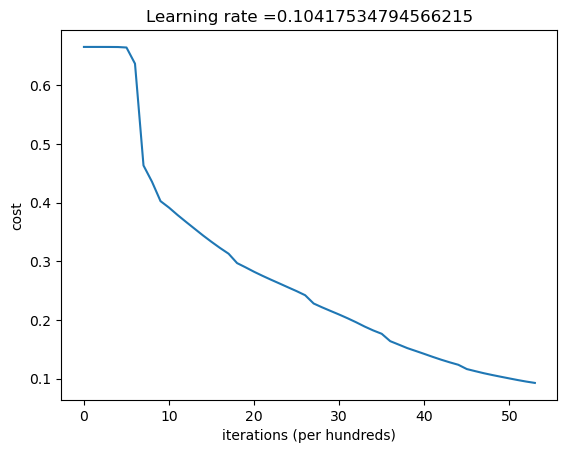

In [184]:
layers_dims = [7, 30, 15, 1]
parameters = model(X_train, Y_train, layers_dims)

In [172]:
Y_test, _ = forward_propagation(X_test, parameters)
# Convert test predictions to binary labels (0 or 1)
Y_pred = (Y_test > 0.5).astype(int)
print(Y_pred.shape)
print(testdata_df['PassengerId'].to_numpy().reshape(-1, 1).shape)

result = pd.DataFrame({
    'PassengerId' : testdata_df['PassengerId'].to_numpy().flatten(),
    'Survived' : Y_pred.flatten()
    })
result.to_csv('结果/result.csv', index = False)

(1, 418)
(418, 1)
